Saved high‑quality figure to /Users/alexlawson/Desktop/microglia_pca_clusters.png


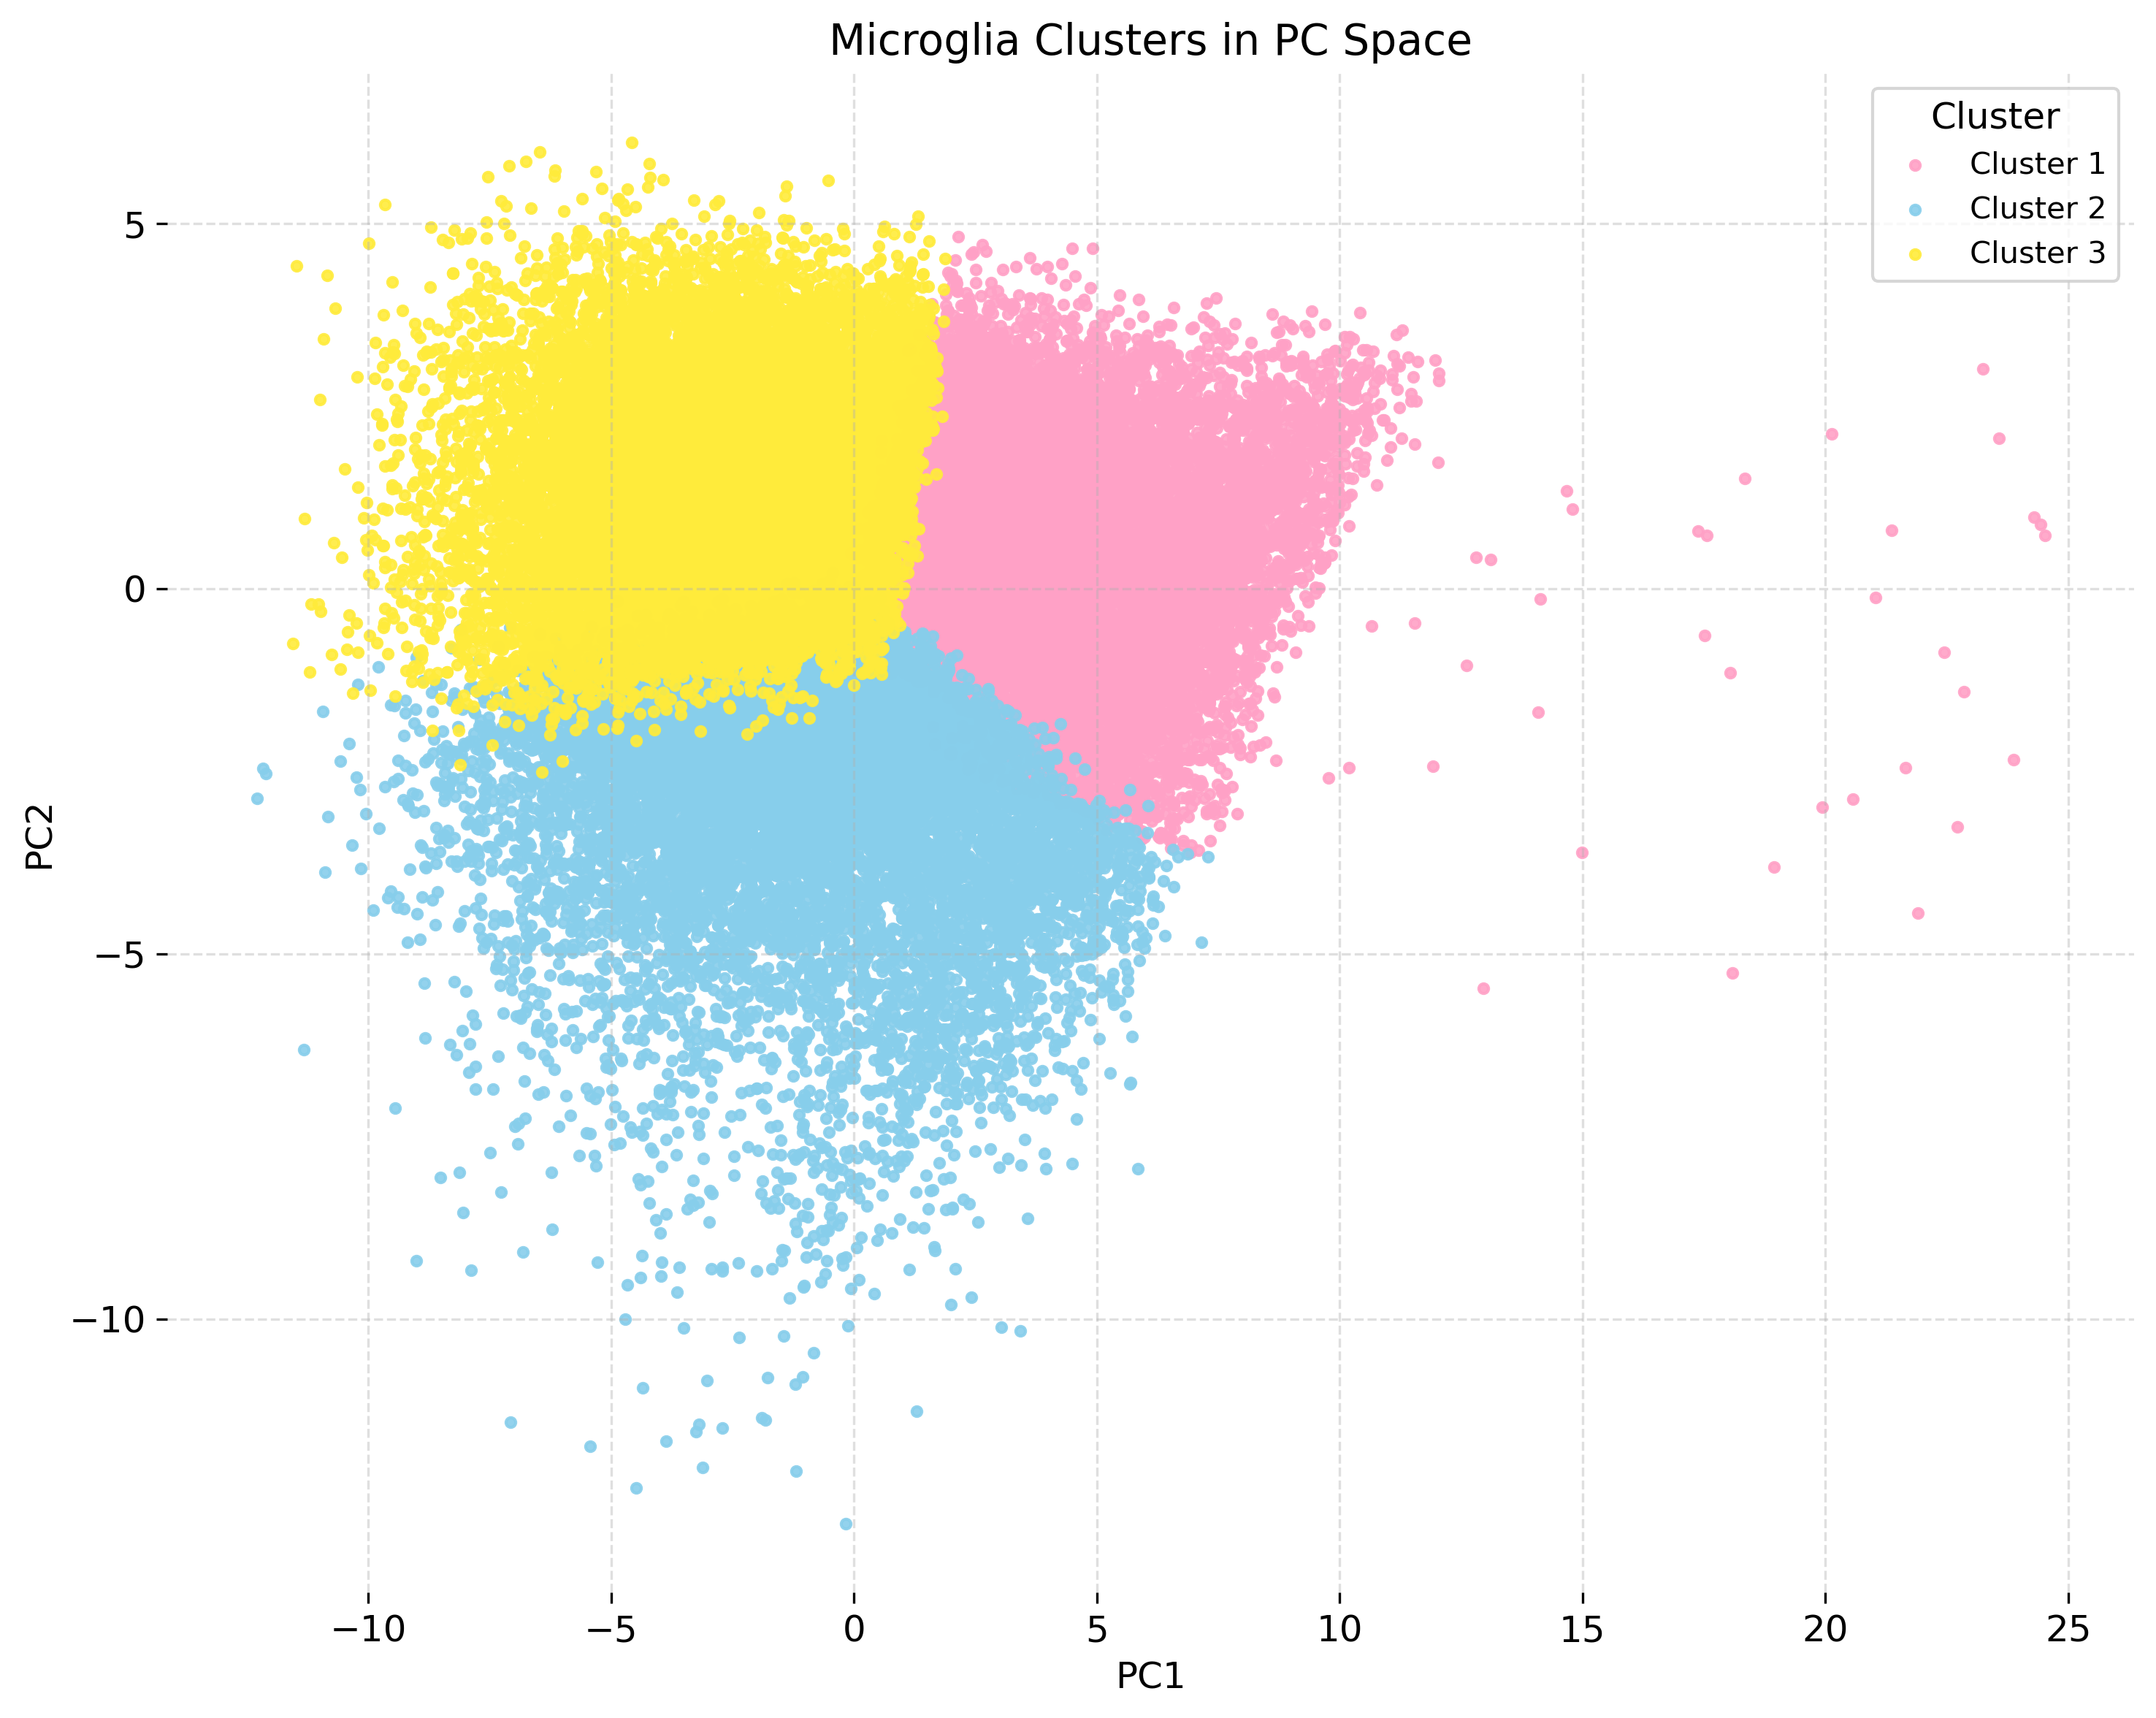

In [15]:
#!/usr/bin/env python3

import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import MultipleLocator  # ← import here

def main():
    # path to your processed dataframe
    csv_path = os.path.expanduser(
        "/Users/alexlawson/Desktop/Masters-Work/data-frames/processed-dataframe.csv"
    )
    
    # load data
    df = pd.read_csv(csv_path)
    
    # define colour map for clusters
    color_map = {
        1: "#FFA1C6",  # Cluster 1
        2: "#87CEEB",  # Cluster 2
        3: "#FFEB3B"   # Cluster 3
    }
    
    # configure for high‑quality output
    plt.rcParams.update({
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'font.size': 12,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'legend.fontsize': 10,
        'axes.grid': True,
        'grid.linestyle': '--',
        'grid.alpha': 0.4
    })
    
    # create figure + axes
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # plot each cluster
    for cluster_id, hex_color in color_map.items():
        subset = df[df["Cluster"] == cluster_id]
        ax.scatter(
            subset["PC1"],
            subset["PC2"],
            label=f"Cluster {cluster_id}",
            color=hex_color,
            alpha=0.9,
            s=10
        )

    # hide the axis lines
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # set major ticks every 5 units
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_locator(MultipleLocator(5))
    
    # labels, title, legend
    ax.set_title("Microglia Clusters in PC Space")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend(title="Cluster", loc='best')
    
    # tidy up
    fig.tight_layout()
    
    # save to Desktop
    save_path = os.path.expanduser("~/Desktop/microglia_pca_clusters.png")
    fig.savefig(save_path, dpi=300)
    print(f"Saved high‑quality figure to {save_path}")
    
    # show on screen
    plt.show()

if __name__ == "__main__":
    main()
